# Notebook to 10vs10 analysis

In [1]:
%matplotlib inline
%run ~/work/washu/bed/bedtrace.py
import matplotlib.pyplot as plt

# Diffbind data preparation 10vs10
Use the following cmd to prepare config for DiffBind: 

```
bash ~/work/washu/analysis/diffbind_config.sh /Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed k27ac_10vs10 > k27ac_10vs10_diffbind.csv
bash ~/work/washu/analysis/diffbind_config.sh /Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed k4me1_10vs10_reseq > k4me1_10vs10_reseq_diffbind.csv
```


# K27ac

In [2]:
import pandas as pd

def load(path):
    db = pd.read_csv(path, sep='\t')

    YDS={}
    for index, row in db[db['Condition'] == 'Y'].iterrows():
        peaks = row['Peaks'].replace('.xls', '.broadPeak')
        YDS[row['SampleID']] = Bed(peaks)
    print ('K27ac YDS: {}'.format(len(YDS)))
    for k, v in YDS.items():
        print('{}: {}'.format(k, v.count()))    

    ODS={}
    for index, row in db[db['Condition'] == 'O'].iterrows():
        peaks = row['Peaks'].replace('.xls', '.broadPeak')
        ODS[row['SampleID']] = Bed(peaks)
    print('K27ac ODS: {}'.format(len(ODS)))
    for k, v in ODS.items():
        print('{}: {}'.format(k, v.count()))    
    return YDS, ODS

YDS, ODS = load('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/k27ac_10vs10_diffbind.csv')
# Filter out tracks with bad quality    
YDS = {k:YDS[k] for k in YDS.keys() if k not in ['YD14', 'YD16']} 

K27ac YDS: 17
YD5: 50726
YD4: 56380
YD21: 14062
YD15: 15864
YD8: 51938
YD20: 23629
YD7: 54088
YD6: 55914
YD9: 58643
YD17: 25733
YD11: 58498
YD12: 47291
YD10: 26377
YD14: 1101
YD16: 7791
YD19: 29209
YD18: 23708
K27ac ODS: 17
OD16: 33719
OD18: 16683
OD12: 26549
OD19: 32576
OD14: 39058
OD4: 33925
OD10: 34771
OD13: 38028
OD15: 34798
OD7: 25602
OD11: 12801
OD17: 22374
OD8: 29302
OD6: 41696
OD5: 37698
OD20: 18426
OD9: 35452


# Peaks distribution

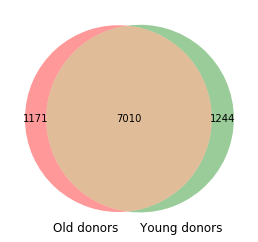

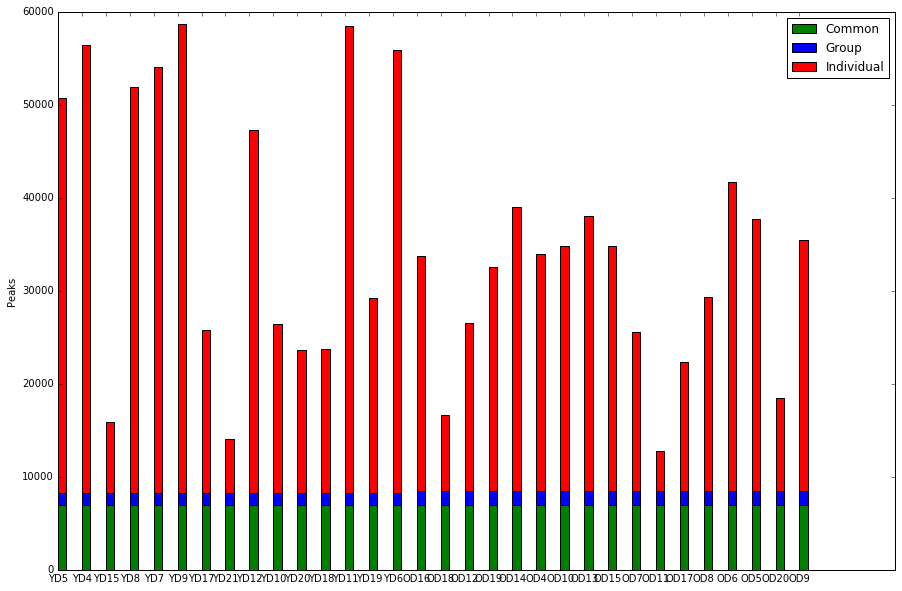

In [3]:
import numpy as np

def intersect_peaks(YDS, ODS):
    YD_intersection = intersect(*YDS.values())
    OD_intersection = intersect(*ODS.values())
    YD_OD_intersection = intersect(YD_intersection, OD_intersection)
    metapeaks({'Young donors': YD_intersection, 'Old donors': OD_intersection})
    plt.show()
   
    N = len(YDS) + len(ODS)
    ind=np.arange(N)

    common_peaks = [YD_OD_intersection.count()] * N 
    group_specific = [YD_intersection.count() - YD_OD_intersection.count()] * len(YDS) +\
                    [OD_intersection.count() - YD_OD_intersection.count()] * len(ODS)
    sample_specific = []
    names = []
    for k, v in YDS.items():
        sample_specific.append(v.count() - YD_intersection.count())
        names.append(k)
    for k, v in ODS.items():
        sample_specific.append(v.count() - OD_intersection.count())
        names.append(k)
    
    plt.figure(figsize=(15,10))
    width=0.35
    p1 = plt.bar(ind, common_peaks, width, color='green')
    p2 = plt.bar(ind, group_specific, width, bottom=common_peaks, color='blue')
    p3 = plt.bar(ind, sample_specific, width, bottom=np.sum([common_peaks,group_specific], axis=0), color='red')
    plt.ylabel('Peaks')
    plt.xticks(ind, names)
    plt.legend((p1[0], p2[0], p3[0]), ('Common', 'Group', 'Individual'))
    plt.show()

intersect_peaks(YDS, ODS)

# K4me1 10vs10

K27ac YDS: 15
YD5: 103727
YD6: 132314
YD15: 132525
YD8: 133229
YD20: 133921
YD7: 131999
YD9: 123570
YD17: 125025
YD11: 135254
YD12: 122684
YD10: 101107
YD14: 12334
YD16: 138032
YD19: 128809
YD18: 122386
K27ac ODS: 17
OD16: 128621
OD18: 127108
OD12: 137130
OD19: 133664
OD14: 131310
OD4: 127021
OD10: 133512
OD13: 144949
OD15: 129138
OD7: 119910
OD11: 133368
OD17: 102726
OD8: 135484
OD6: 130868
OD5: 116583
OD20: 136789
OD9: 126805


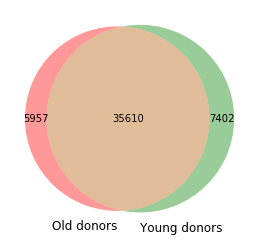

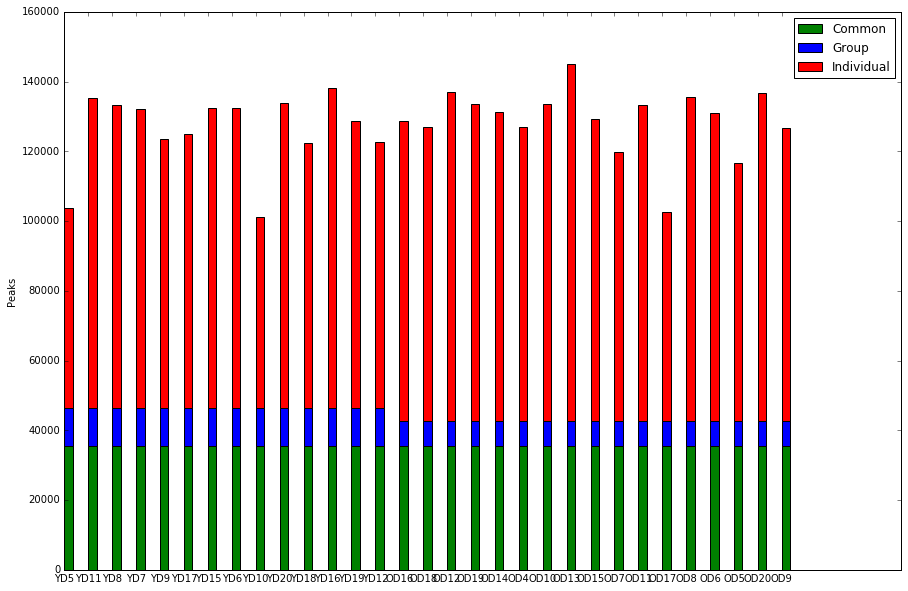

In [4]:
YDS, ODS = load('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/k4me1_10vs10_reseq_diffbind.csv')
# Filter out tracks with bad quality    
YDS = {k:YDS[k] for k in YDS.keys() if k not in ['YD14']}
intersect_peaks(YDS, ODS)